### Importar las librerias principales

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
df_car = pd.read_csv('data/car_evaluation.csv', header=None)

### Analisis exploratorio

In [31]:
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [32]:
df_car.shape

(1728, 7)

In [33]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [34]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [36]:
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [37]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Procesamiento de datos

In [38]:
# Separamos en X e Y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [39]:
#Importamos las libreiras necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [41]:
y_train.shape, y_test.shape

((1209,), (519,))

In [42]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [43]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Entrenamiento de modelo de clasificacion con arbol de decision

In [44]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [45]:
import category_encoders as ce

In [46]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [47]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [48]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2 , random_state=0)

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [50]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

### Evaluacion de modelo de clasificacion con arbol de decision

In [51]:
# Calculo de metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('The accuracy in Train is: ', train_accuracy_tree)
print('The accuracy in Test is: ', test_accuracy_tree)

The accuracy in Train is:  0.7733664185277088
The accuracy in Test is:  0.7591522157996147


C:\Users\david\AppData\Local\Temp\ipykernel_16832\1984747991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


<Axes: xlabel='None'>

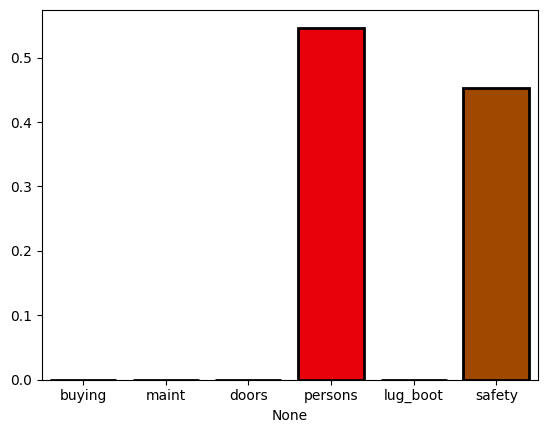

In [52]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

### Entrenamiento de modelo de clasificacion con random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [54]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

### Evaluacion de modelo de clasificacion con random forest

In [55]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('The accuracy in Train with Random Forest is: ', train_accuracy_rf)
print('The accuracy in Test with Random Forest is: ', test_accuracy_rf)

The accuracy in Train with Random Forest is:  0.9942100909842845
The accuracy in Test with Random Forest is:  0.8863198458574181


In [57]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

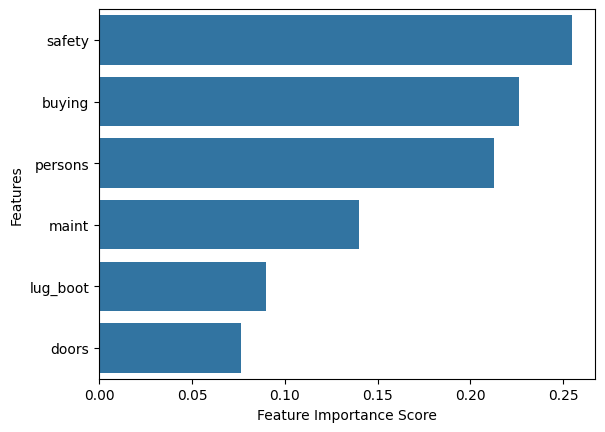

In [59]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [61]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Classification Report:
              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

